In [7]:
from projects.NeuralForceField.train import *
from projects.NeuralForceField.graphs import * 
import numpy as np

In [8]:
data = pickle.load(open('/home/wwj/data/lipoly/COC_NMS.pkl', "rb" ) )

xyz_data = []
force_data = []
energy_data = []
smiles_data = []

for item in data:
    xyz_data.append(item[0]) 
    force_data.append(item[1])
    energy_data.append(item[2])
    smiles_data.append(item[3])

#plt.hist(np.array(energy_data) * 627.509, bins = 100)
#plt.show()

In [9]:
# initialize parameters
par = dict()

par["git_commit"] = "9129a434b318ab26ee890281f531f304fb499ca7"
par["model_type"] = "schnet"
par["n_filters"] = 256
par["n_gaussians"] = 32
par["n_atom_basis"] = 256
par["optim"] = 1e-4
par["scheduler"] = True
par["train_percentage"] = 0.8
par["T"] = 10
par["batch_size"] = 100
par["cutoff"] = 5.0 
par["max_epoch"] = 1000
par["trainable_gauss"] = True
par["rho"] = 0.1
par["eps"] = 1e-4

graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, 
                             batch_size=par["batch_size"], cutoff=par["cutoff"], 
                             force_data=force_data, au_flag=True, subtract_mean_flag = True)



In [17]:
dataset_size = len(energy_data)
batch_size = 100
indices = [i for i in range(dataset_size)]
batches_of_indices = [indices[i:i+ batch_size] for i in range(0, dataset_size, batch_size)]

batches_of_indices[-1]
    

100

In [4]:
model = Model(par=par, graph_data=graph_data, device=1, job_name="COC", graph_batching=False, root='./log/')
model.train(2)

/home/wwj/Repo/projects/NeuralForceField/train.py:228: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_u = train_u_mae.data[0]/self.N_train
/home/wwj/Repo/projects/NeuralForceField/train.py:229: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_force = train_force_mae.data[0]/self.N_train


epoch 0  U train: 1.932  force train 5.228
epoch 1  U train: 0.331  force train 1.585


In [5]:
model = Model(par=par, graph_data=graph_data, device=1, job_name="COC", graph_batching=True, root='./log/')
model.train(2)

/home/wwj/Repo/projects/NeuralForceField/train.py:228: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_u = train_u_mae.data[0]/self.N_train
/home/wwj/Repo/projects/NeuralForceField/train.py:229: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_force = train_force_mae.data[0]/self.N_train


epoch 0  U train: 1.132  force train 5.161
epoch 1  U train: 0.304  force train 1.502


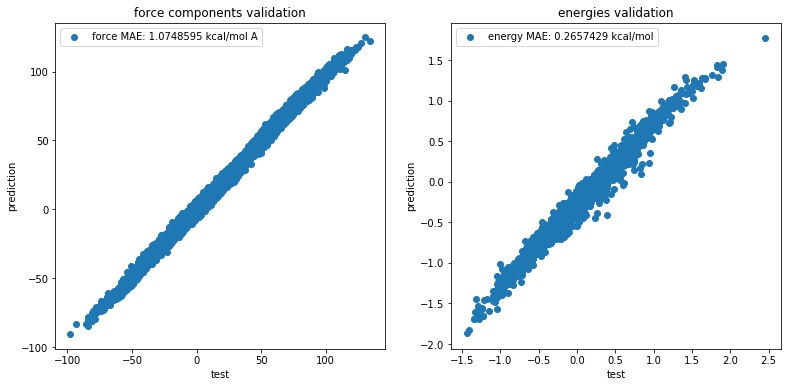

In [6]:
model.validate()

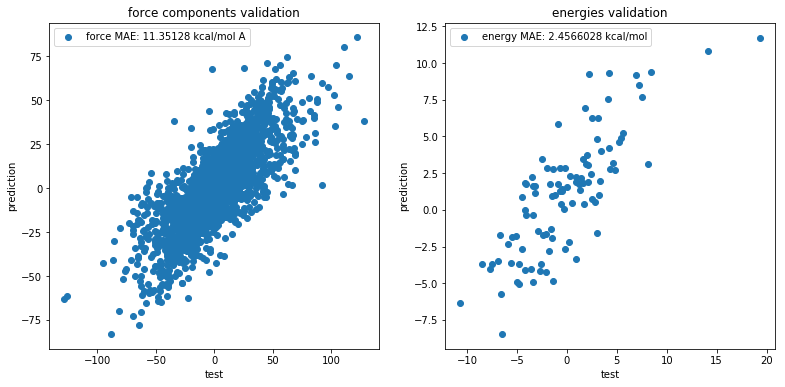

In [6]:
model.save_summary()

In [8]:
model.NVE(steps=100, dt=0.1, T =0.0)

step 0
Energy per atom: Epot = -2.519kcal/mol  Ekin = 13.147kcal/mol (T=490K)  Etot = 10.628kcal/mol
step 20
Energy per atom: Epot = -5.800kcal/mol  Ekin = 19.714kcal/mol (T=735K)  Etot = 13.913kcal/mol
step 40
Energy per atom: Epot = -5.812kcal/mol  Ekin = 19.744kcal/mol (T=736K)  Etot = 13.932kcal/mol
step 60
Energy per atom: Epot = -7.877kcal/mol  Ekin = 23.861kcal/mol (T=889K)  Etot = 15.985kcal/mol
step 80
Energy per atom: Epot = -4.592kcal/mol  Ekin = 17.301kcal/mol (T=645K)  Etot = 12.709kcal/mol
